# Bank dataset

We have a transaction details of 515 banks which include number of DD taken, Withdrawals, Deposits, Area of the branch and Average Walk-Ins. Profile the banks into segments and come up with recommendations for each segment.

# Import libraries and load data

In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#importing the data
data_df = pd.read_csv("bank.csv")

# Check the data. Check shape, data type, and info

In [3]:
#checking the data
data_df.head()

,Bank,DD,Withdrawals,Deposits,Branch Area in sqft,avg daily walkins
0,1,227,147,111,2460,639
1,2,123,86,65,3510,436
2,3,306,149,76,2570,669
3,4,251,112,129,3650,623
4,5,174,135,128,3400,579


In [4]:
data_df.tail()

,Bank,DD,Withdrawals,Deposits,Branch Area in sqft,avg daily walkins
510,511,337,140,111,2640,694
511,512,168,131,60,2640,524
512,513,333,86,108,2850,676
513,514,192,176,34,2760,505
514,515,331,186,97,2700,767


In [5]:
# shape of the dataset
data_df.shape

(515, 6)

In [6]:
# datatypes of the attributes in the dataset
data_df.dtypes

Bank                   int64
DD                     int64
Withdrawals            int64
Deposits               int64
Branch Area in sqft    int64
avg daily walkins      int64
dtype: object

In [7]:
# get the info of the dataset
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515 entries, 0 to 514
Data columns (total 6 columns):
Bank                   515 non-null int64
DD                     515 non-null int64
Withdrawals            515 non-null int64
Deposits               515 non-null int64
Branch Area in sqft    515 non-null int64
avg daily walkins      515 non-null int64
dtypes: int64(6)
memory usage: 24.3 KB


In [8]:
# check for the null 
data_df.isnull().sum()

Bank                   0
DD                     0
Withdrawals            0
Deposits               0
Branch Area in sqft    0
avg daily walkins      0
dtype: int64

In [9]:
## There are 515 datapoints in the dataset and 6 attributes.
## All the attributes are of the type int.
## The dataset seems to have no null values.

# Checking Summary Statistic

In [10]:
# checking summary statistics
data_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Bank,515.0,258.000000,148.811962,1.0,129.5,258.0,386.5,515.0
DD,515.0,232.252427,66.648815,120.0,169.5,237.0,291.0,350.0
Withdrawals,515.0,150.693204,56.897777,10.0,103.0,152.0,200.0,247.0
Deposits,515.0,81.687379,28.596912,33.0,58.0,80.0,105.0,212.0
Branch Area in sqft,515.0,2934.669903,437.062831,1200.0,2675.0,2960.0,3300.0,3650.0
avg daily walkins,515.0,598.603883,83.487891,380.0,537.5,601.0,657.5,838.0


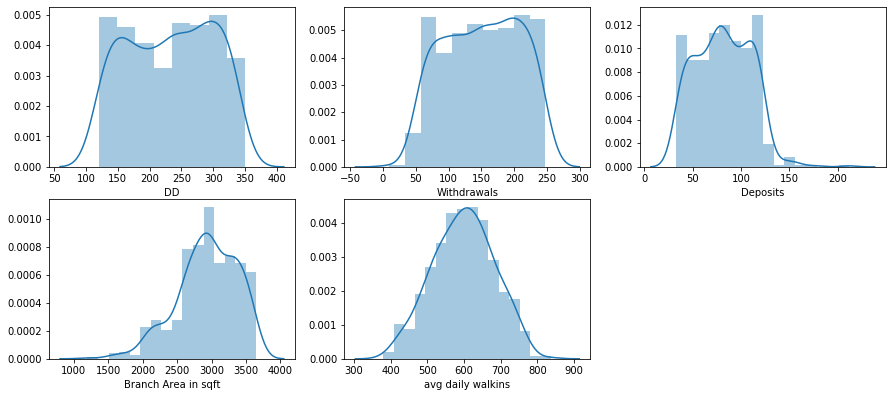

In [11]:
# distribution of other attributes
plt.figure(figsize=(15,10))
plt.subplot(3,3,1)
sns.distplot(data_df['DD'])

plt.subplot(3,3,2)
sns.distplot(data_df['Withdrawals'])

plt.subplot(3,3,3)
sns.distplot(data_df['Deposits'])

plt.subplot(3,3,4)
sns.distplot(data_df['Branch Area in sqft'])

plt.subplot(3,3,5)
sns.distplot(data_df['avg daily walkins'])

plt.show()

In [12]:
## Able to see various modes in the DD, Withdrawals, Deposits and Branch Area in sqft attributes. These are showing the presence of clusters.
## The range of the values are high for all the attributes.
## The Branch Area in sqft attribute is left skewed. ALmost 75% of the banks has the built in area greater than 2650 sq ft.
## The attribute avg daily walkings seems to be having a normal distribution. The mean and the mode are almost having the same value.
## Deposits are right skewed. 

# Checking for Duplicates

In [13]:
# checking for duplicates
data_df.drop('Bank',axis =1).duplicated().sum()

0

In [14]:
## there are no duplicates

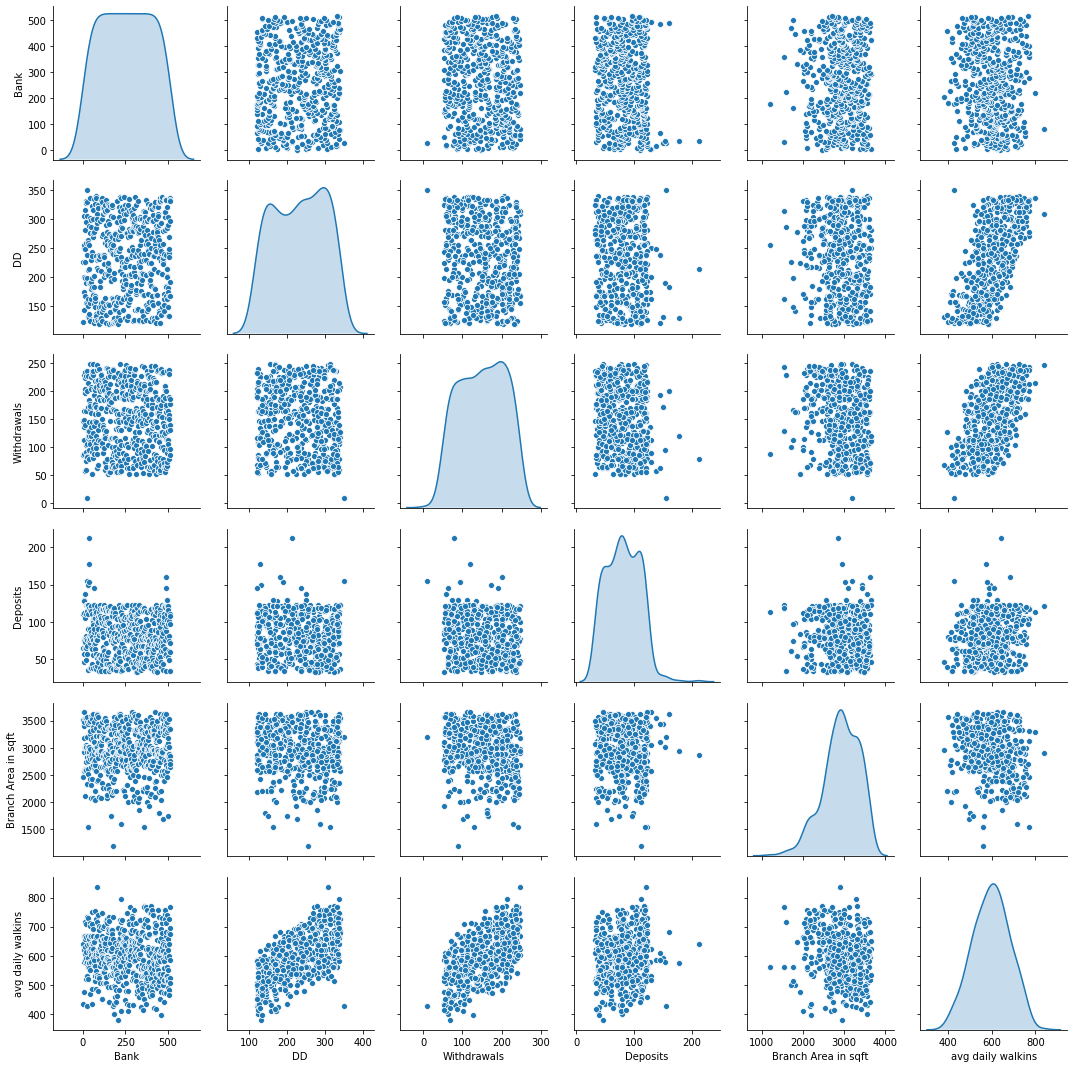

In [15]:
# visualizing the dataframe
sns.pairplot(data_df, diag_kind='kde')
plt.show()

In [16]:
## visually looking at the peaks there seems to be 4 clusters.

# Scaling the data

In [17]:
# importing the StandardScaler Module
from sklearn.preprocessing import StandardScaler

In [18]:
# Creating an object for the StandardScaler function
stdScaler = StandardScaler()

In [19]:
# removing the Bank column which is an identity 
data_df = data_df.drop('Bank',axis =1)
data_df.sample(10)

,DD,Withdrawals,Deposits,Branch Area in sqft,avg daily walkins
39,191,176,38,3250,550
234,164,89,79,2660,498
208,165,189,122,2910,642
214,251,76,89,3620,561
216,211,224,119,3580,677
90,320,68,108,2410,620
459,294,100,73,2910,621
463,338,122,99,2900,712
237,163,160,120,3190,583
194,245,147,56,2200,574


In [20]:
# scaling the data
scaled_df = stdScaler.fit_transform(data_df)
scaled_df

array([[-0.07888413, -0.06497257,  1.02602411, -1.08710095,  0.48432644],
       [-1.64081915, -1.13811308, -0.58410514,  1.31763546, -1.949528  ],
       [ 1.10758573, -0.02978763, -0.19907423, -0.83517619,  0.84400936],
       ...,
       [ 1.51308809, -1.13811308,  0.92101568, -0.19391314,  0.92793538],
       [-0.60453534,  0.44520899, -1.66919225, -0.40003341, -1.12225728],
       [ 1.48305088,  0.62113366,  0.53598477, -0.53744692,  2.01897357]])

# Creating Clusters using KMeans

### Build a KMeans model having 2 Clusters

In [21]:
# Create K Means cluster and store the result in the object k_means
model_2=KMeans(n_clusters=2,n_init = 15, random_state=2)

In [22]:
# Fit K means on the scaled_df
model_2.fit(scaled_df)

predict = model_2.predict(scaled_df)

### Check cluster Output for all the observations

In [23]:
# Get the labels
model_2.labels_

array([1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1,

### Calculate within Cluster Sum of Squares

In [24]:
# getting the WCSS for clusters = 2
model_2.inertia_

1943.167696785115

### Form clusters with K = 1,3,4,5,6 and compare the WSS ( within cluster sum of squares)

In [25]:
# Create K Means cluster for k=1
model_1=KMeans(n_clusters=1,n_init = 15, random_state=2)
model_1.fit(scaled_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=1, n_init=15, n_jobs=None, precompute_distances='auto',
       random_state=2, tol=0.0001, verbose=0)

In [26]:
wss1 = model_1.inertia_

In [27]:
# Create K Means cluster for k=3 
model_3=KMeans(n_clusters=3,n_init = 15, random_state=2)
model_3.fit(scaled_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=15, n_jobs=None, precompute_distances='auto',
       random_state=2, tol=0.0001, verbose=0)

In [28]:
wss3 = model_3.inertia_

In [29]:
# Create K Means cluster for k=4 
model_4=KMeans(n_clusters=4,n_init = 15, random_state=2)
model_4.fit(scaled_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=15, n_jobs=None, precompute_distances='auto',
       random_state=2, tol=0.0001, verbose=0)

In [30]:
wss4 = model_4.inertia_

In [31]:
# Create K Means cluster for k=5
model_5=KMeans(n_clusters=5,n_init = 15, random_state=2)
model_5.fit(scaled_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=15, n_jobs=None, precompute_distances='auto',
       random_state=2, tol=0.0001, verbose=0)

In [32]:
wss5 = model_5.inertia_

In [33]:
# Create K Means cluster for k=6
model_6=KMeans(n_clusters=6,n_init = 15, random_state=2)
model_6.fit(scaled_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=15, n_jobs=None, precompute_distances='auto',
       random_state=2, tol=0.0001, verbose=0)

In [34]:
wss6 = model_6.inertia_

In [35]:
print("WSS for K = 1 is" , wss1)
print("WSS for K = 3 is" , wss3)
print("WSS for K = 4 is" , wss4)
print("WSS for K = 5 is" , wss5)
print("WSS for K = 6 is" , wss6)

WSS for K = 1 is 2575.0
WSS for K = 3 is 1593.924665633818
WSS for K = 4 is 1375.385545820725
WSS for K = 5 is 1220.0210500705134
WSS for K = 6 is 1113.9410835066458


In [36]:
#checking the differences of the inertia 
print(wss1- model_2.inertia_)
print(model_2.inertia_ - wss3 )
print(wss3- wss4)
print(wss4- wss5)
print(wss5- wss6)

631.8323032148851
349.2430311512969
218.53911981309307
155.36449575021152
106.07996656386763


In [37]:
## As the number of clusters increase the inertia or within the sum of squared errors keeps decreasing.
## From k = 4 can observe the difference in the inertia values are not that high and almost tapers out as we progress.

### Calculate WSS for other values of K ( can use range of K = 1 to 20) - Elbow Method

In [38]:
wss =[] 
k_range = range(1,20)
for k in k_range:
    model=KMeans(n_clusters=k,n_init = 15, random_state=2)
    model.fit(scaled_df)
    wss.append(model.inertia_)

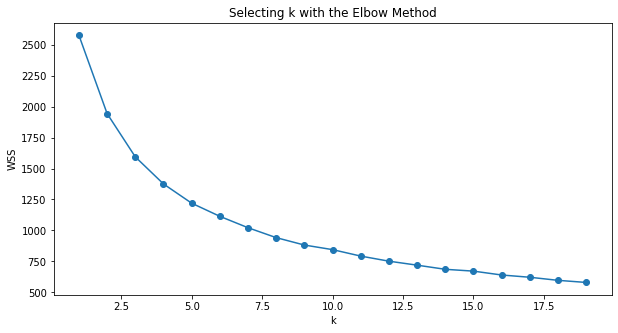

In [39]:
plt.figure(figsize=(10,5))
plt.xlabel('k')
plt.ylabel('WSS')
plt.title('Selecting k with the Elbow Method')
plt.plot(k_range, wss, marker = "o" )
plt.show()

In [40]:
## looks at k=4 the line the WSS keeps decreasing marginally. K=4 seems to be the optimal value

## Build a KMeans model with K=3

In [41]:
# Create K Means cluster for k=3 
model_3=KMeans(n_clusters=3,n_init = 15, random_state=2)
model_3.fit(scaled_df)
model_3_labels = model_3.predict(scaled_df)

### Use silhouette score to evaluate the above model ( 3 clusters)

In [42]:
from sklearn.metrics import silhouette_score, silhouette_samples

In [43]:
# Calculating silhouette_score
silhouetteScore_K3= silhouette_score(scaled_df,model_3_labels)
silhouetteScore_K3

0.21978702780174172

# Build a KMeans model with K=4

### Use silhouette score to evaluate the above model ( 4 clusters)

In [44]:
#from sklearn.metrics import silhouette_samples, silhouette_score
model_4=KMeans(n_clusters=4,n_init = 15, random_state=2)
model_4.fit(scaled_df)
model_4_labels = model_4.predict(scaled_df)

In [45]:
# Calculating silhouette_score
silhouetteScore_k4= silhouette_score(scaled_df,model_4_labels)
silhouetteScore_k4

0.22723169601871737

Automatically created module for IPython interactive environment
For n_clusters = 3 The average silhouette_score is : 0.21979497658305341
For n_clusters = 4 The average silhouette_score is : 0.22705908803626518


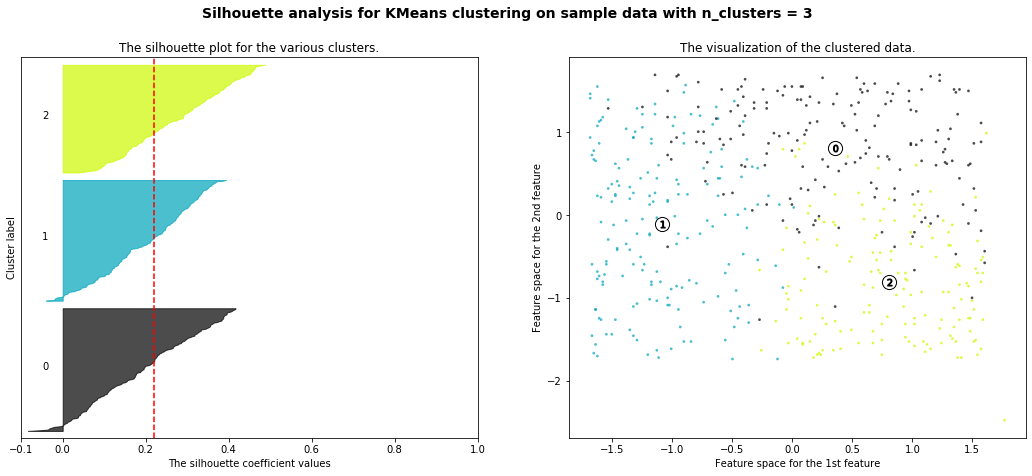

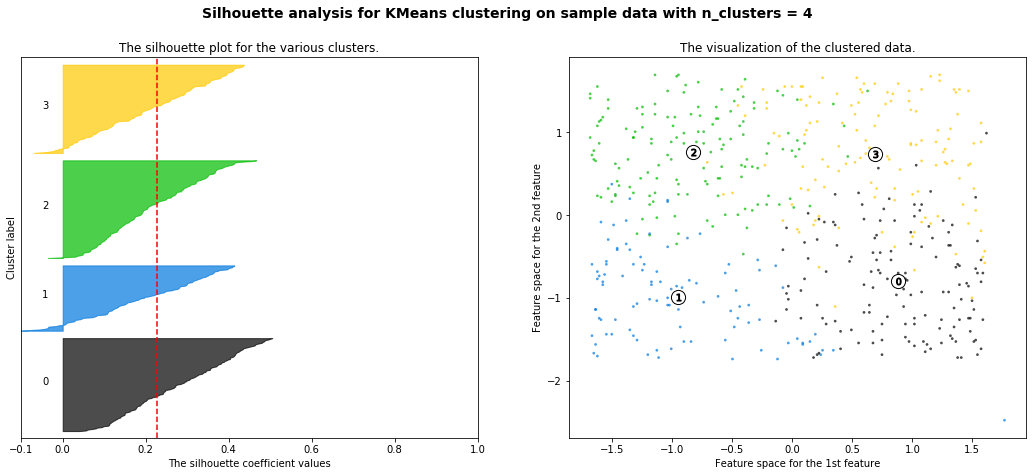

In [46]:
from sklearn.datasets import make_blobs

import matplotlib.cm as cm

print(__doc__)

range_n_clusters = [3, 4]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(scaled_df) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(scaled_df)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(scaled_df, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(scaled_df, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(scaled_df[:, 0], scaled_df[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

In [47]:
## with clusters 3 and 4 can see good clustering and also the silhouette_score difference is marginal.
## with the clusters of 3 from the plt could observe that the many datapoints assigned to one cluster seems to be lying inside the boundary of adjacent cluster.
## cluster of 4 seems to be optimal.

In [48]:
data_df['Clusters'] = model_4_labels

Appending Clusters to the original dataset

# Cluster Profiling

In [49]:
data_df.Clusters.value_counts()

0    147
2    139
1    132
3     97
Name: Clusters, dtype: int64

In [50]:
clust_profile=data_df.groupby('Clusters').mean()
clust_profile['freq']=data_df.Clusters.value_counts()
clust_profile

,DD,Withdrawals,Deposits,Branch Area in sqft,avg daily walkins,freq
Clusters,,,,,,
0,177.102041,193.768707,73.346939,3021.292517,578.836735,147
1,278.378788,192.371212,88.992424,2603.030303,693.424242,132
2,290.884892,105.215827,72.661871,3115.755396,601.388489,139
3,169.041237,93.865979,97.319588,2995.206186,495.536082,97


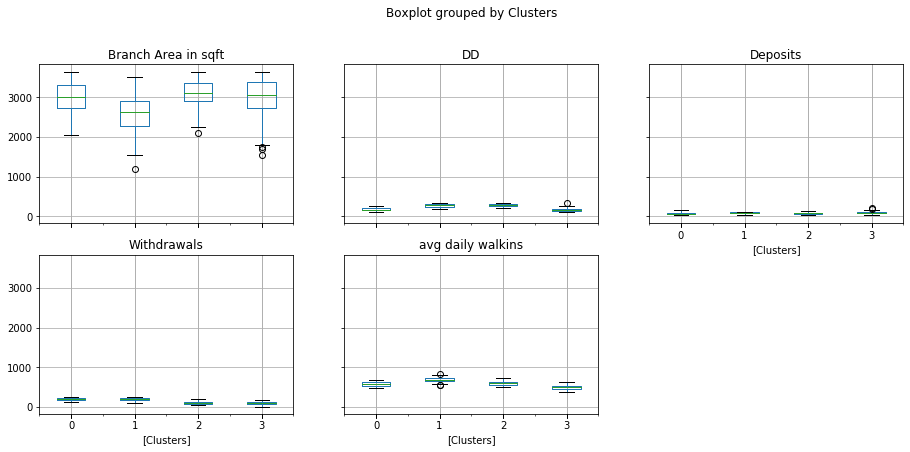

In [51]:
# visualizing the clusters
data_df.boxplot(by='Clusters', layout=(3,3), figsize=(15,10))
plt.show()

# Mention your insights

In [54]:
# the anlysis shows that the clusters with 3 and 4 are having good segmentation.
# from the elbow curve could see the optimal value to be 4.
# in silhouette analysis we see clusters with 3 and 4 are having the silhouette_score with marginal difference and clusters with k = 4 seems to be optimal 
# With 4 clusters we could observe 
## Cluster 0 : The walkins, deposits and DD are less but has the highest withdrawals and size of the bank is medium.
## Cluster 1 : The branch size is the smallest but has the highest walkins and high deposits, withdrawal and DD.
## Cluster 2 : This has the highest DD but less deposits, walkins and withdrawal. This is the largerst branch.
## Cluster 3 : The branch size is the medium having highest deposits but the least DD, withdrawal and walkins.